In [90]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import math
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [91]:
url_base = 'https://movie.naver.com'
url_sub = '/movie/bi/mi/point.nhn?code=130966#tab'
html = urlopen(url_base + url_sub)
soup = BeautifulSoup(html, 'html.parser')

In [92]:
ifr_url = soup.find('iframe')['src']
url_front = url_base + ifr_url + '&page='
url_cnt = url_front+'1'
url_cnt

'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=130966&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'

In [93]:
html = urlopen(url_cnt)
soup = BeautifulSoup(html, 'html.parser')
count = soup.find('strong','total')
count = count.find('em').string     # get_text() 대신에 string
count = int(count.replace(',',''))
page_num = math.ceil(count/10)

In [54]:
star_score = []
reple = []
date = []
page_num = int(page_num/2)
for page in tqdm(range(1,page_num+1)):
    url = url_front+str(page)
    html = urlopen(url)
    soup = BeautifulSoup(html, 'html.parser')
    uls = soup.find_all(class_='score_result')
    rest_list = uls[0].find_all('li')
    num = 0
    for rest in rest_list:
        date.append(rest.find(class_='score_reple').find('dt').find_all('em')[1].get_text())
        star_score.append(rest.find(class_='star_score').get_text().replace('\n',''))
        
        if rest.find(class_='_unfold_ment')!=None:
            reple.append(rest.find(class_='_unfold_ment').find('a')['data-src'])
        else:
            reple.append(rest.find(id='_filtered_ment_'+str(num)).get_text().strip())
        
        num += 1        

In [94]:
df = pd.DataFrame({'star_score':star_score,'reple':reple,'date':date})
df['date'] = pd.to_datetime(df['date'])
# df.sort_values(by='date', ascending = True, inplace=True)
df

,star_score,reple,date
0,10,좀비가 무서운게아니라 사람이무섭다는걸 알려주는영화,2016-07-20 05:57:00
1,10,그냥 한국형 좀비물이 어색하지 않았다는 거에 큰 점수를 주며 앞으로의 한국영화를 기...,2016-07-20 11:56:00
2,10,버스회사 상무라는 사람이 진심 역대급 민폐캐릭터인듯개짜증나고 생존력도 좋음,2016-07-20 00:00:00
3,10,생각보다 너무 재밌었다,2016-07-20 01:11:00
4,6,영화가 너무 비현실적이네요. 예를들어 공유 얼굴이라던가 공유 얼굴 같은 부분이...,2016-07-20 07:30:00
...,...,...,...
28995,9,스릴도 있고 여름휴가동안 더위를 잊게 해주는 보기좋은 영화중에 하나라 생각듭니다.재...,2016-07-31 21:38:00
28996,10,영화를 너무 잘만들다 보니 보는내내 짜증이 너무 났습니다. 실제로 저런일이 일어...,2016-07-31 21:38:00
28997,8,재밌게 봤어요 스토리가 예상이 되었지만 무섭고 슬펐어요,2016-07-31 21:37:00
28998,6,무섭기만 했습니다 해피엔딩도 아니고ㅠ,2016-07-31 21:36:00


In [95]:
df.to_csv('movie_grade_trainToBusan.csv',sep=',',encoding="utf-8")

## Word Cloud

In [96]:
from wordcloud import WordCloud

In [148]:
import nltk
from konlpy.tag import Okt
from konlpy.tag import Komoran
from konlpy.tag import Twitter

In [149]:
twitter = Twitter()
def tokenizer_twitter_morphs(doc):
    return twitter.morphs(doc)

def tokenizer_twitter_noun(doc):
    return twitter.nouns(doc)

def tokenizer_twitter_pos(doc):
    return twitter.pos(doc, norm=True, stem=True)

komoran = Komoran()
def tokenizer_noun(doc):
    return komoran.nouns(doc)

def tokenizer_morphs(doc):
    return komoran.morphs(doc)


In [150]:
df['token_reple'] = df['reple'].apply(tokenizer_twitter_morphs)

In [151]:
df.head()

,star_score,reple,date,token_reple
0,10,좀비가 무서운게아니라 사람이무섭다는걸 알려주는영화,2016-07-20 05:57:00,"[좀비, 가, 무서운게, 아니라, 사람, 이, 무섭다는걸, 알려주는, 영화]"
1,10,그냥 한국형 좀비물이 어색하지 않았다는 거에 큰 점수를 주며 앞으로의 한국영화를 기...,2016-07-20 11:56:00,"[그냥, 한국, 형, 좀비, 물이, 어색하지, 않았다는, 거, 에, 큰, 점수, 를..."
2,10,버스회사 상무라는 사람이 진심 역대급 민폐캐릭터인듯개짜증나고 생존력도 좋음,2016-07-20 00:00:00,"[버스, 회사, 상무, 라는, 사람, 이, 진심, 역대, 급, 민폐, 캐릭터, 인,..."
3,10,생각보다 너무 재밌었다,2016-07-20 01:11:00,"[생각, 보다, 너무, 재밌었다]"
4,6,영화가 너무 비현실적이네요. 예를들어 공유 얼굴이라던가 공유 얼굴 같은 부분이...,2016-07-20 07:30:00,"[영화, 가, 너무, 비현실적, 이네, 요, ., 예, 를, 들어, 공유, 얼굴, ..."


In [154]:
tokens = [ t for d in df['token_reple'] for t in d]

In [155]:
len(tokens)

454669

In [110]:
text = df.reple.values

In [139]:

import konlpy
stopwords = nltk.corpus.stopwords.words('korean') # 불용어 객체 선언
# newStopWords = ['stopWord1','stopWord2'] # 추가하고 싶은 불용어 리스트
stopwords.extend(newStopWords) # 불용어 사전 업데이트 stopwords

# STOPWORDS = {'은', '입니다','봤어요','거에','했습니다','않았다는','주며','되었지만','슬펐어요','알려주는영화\'','아니고ㅠ\'','슬펐어요\'','잘생김\'','좋음\''}
# wordcloud = WordCloud(
#     width = 3000,
#     height = 2000,
#     background_color = 'black',
#     stopwords = STOPWORDS).generate(str(text))

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path='/Library/Fonts/AppleGothic.ttf', stopwords = stopwords).generate(str(text)) #맥

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/ryung/nltk_data'
    - '/Users/ryung/anaconda3/nltk_data'
    - '/Users/ryung/anaconda3/share/nltk_data'
    - '/Users/ryung/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


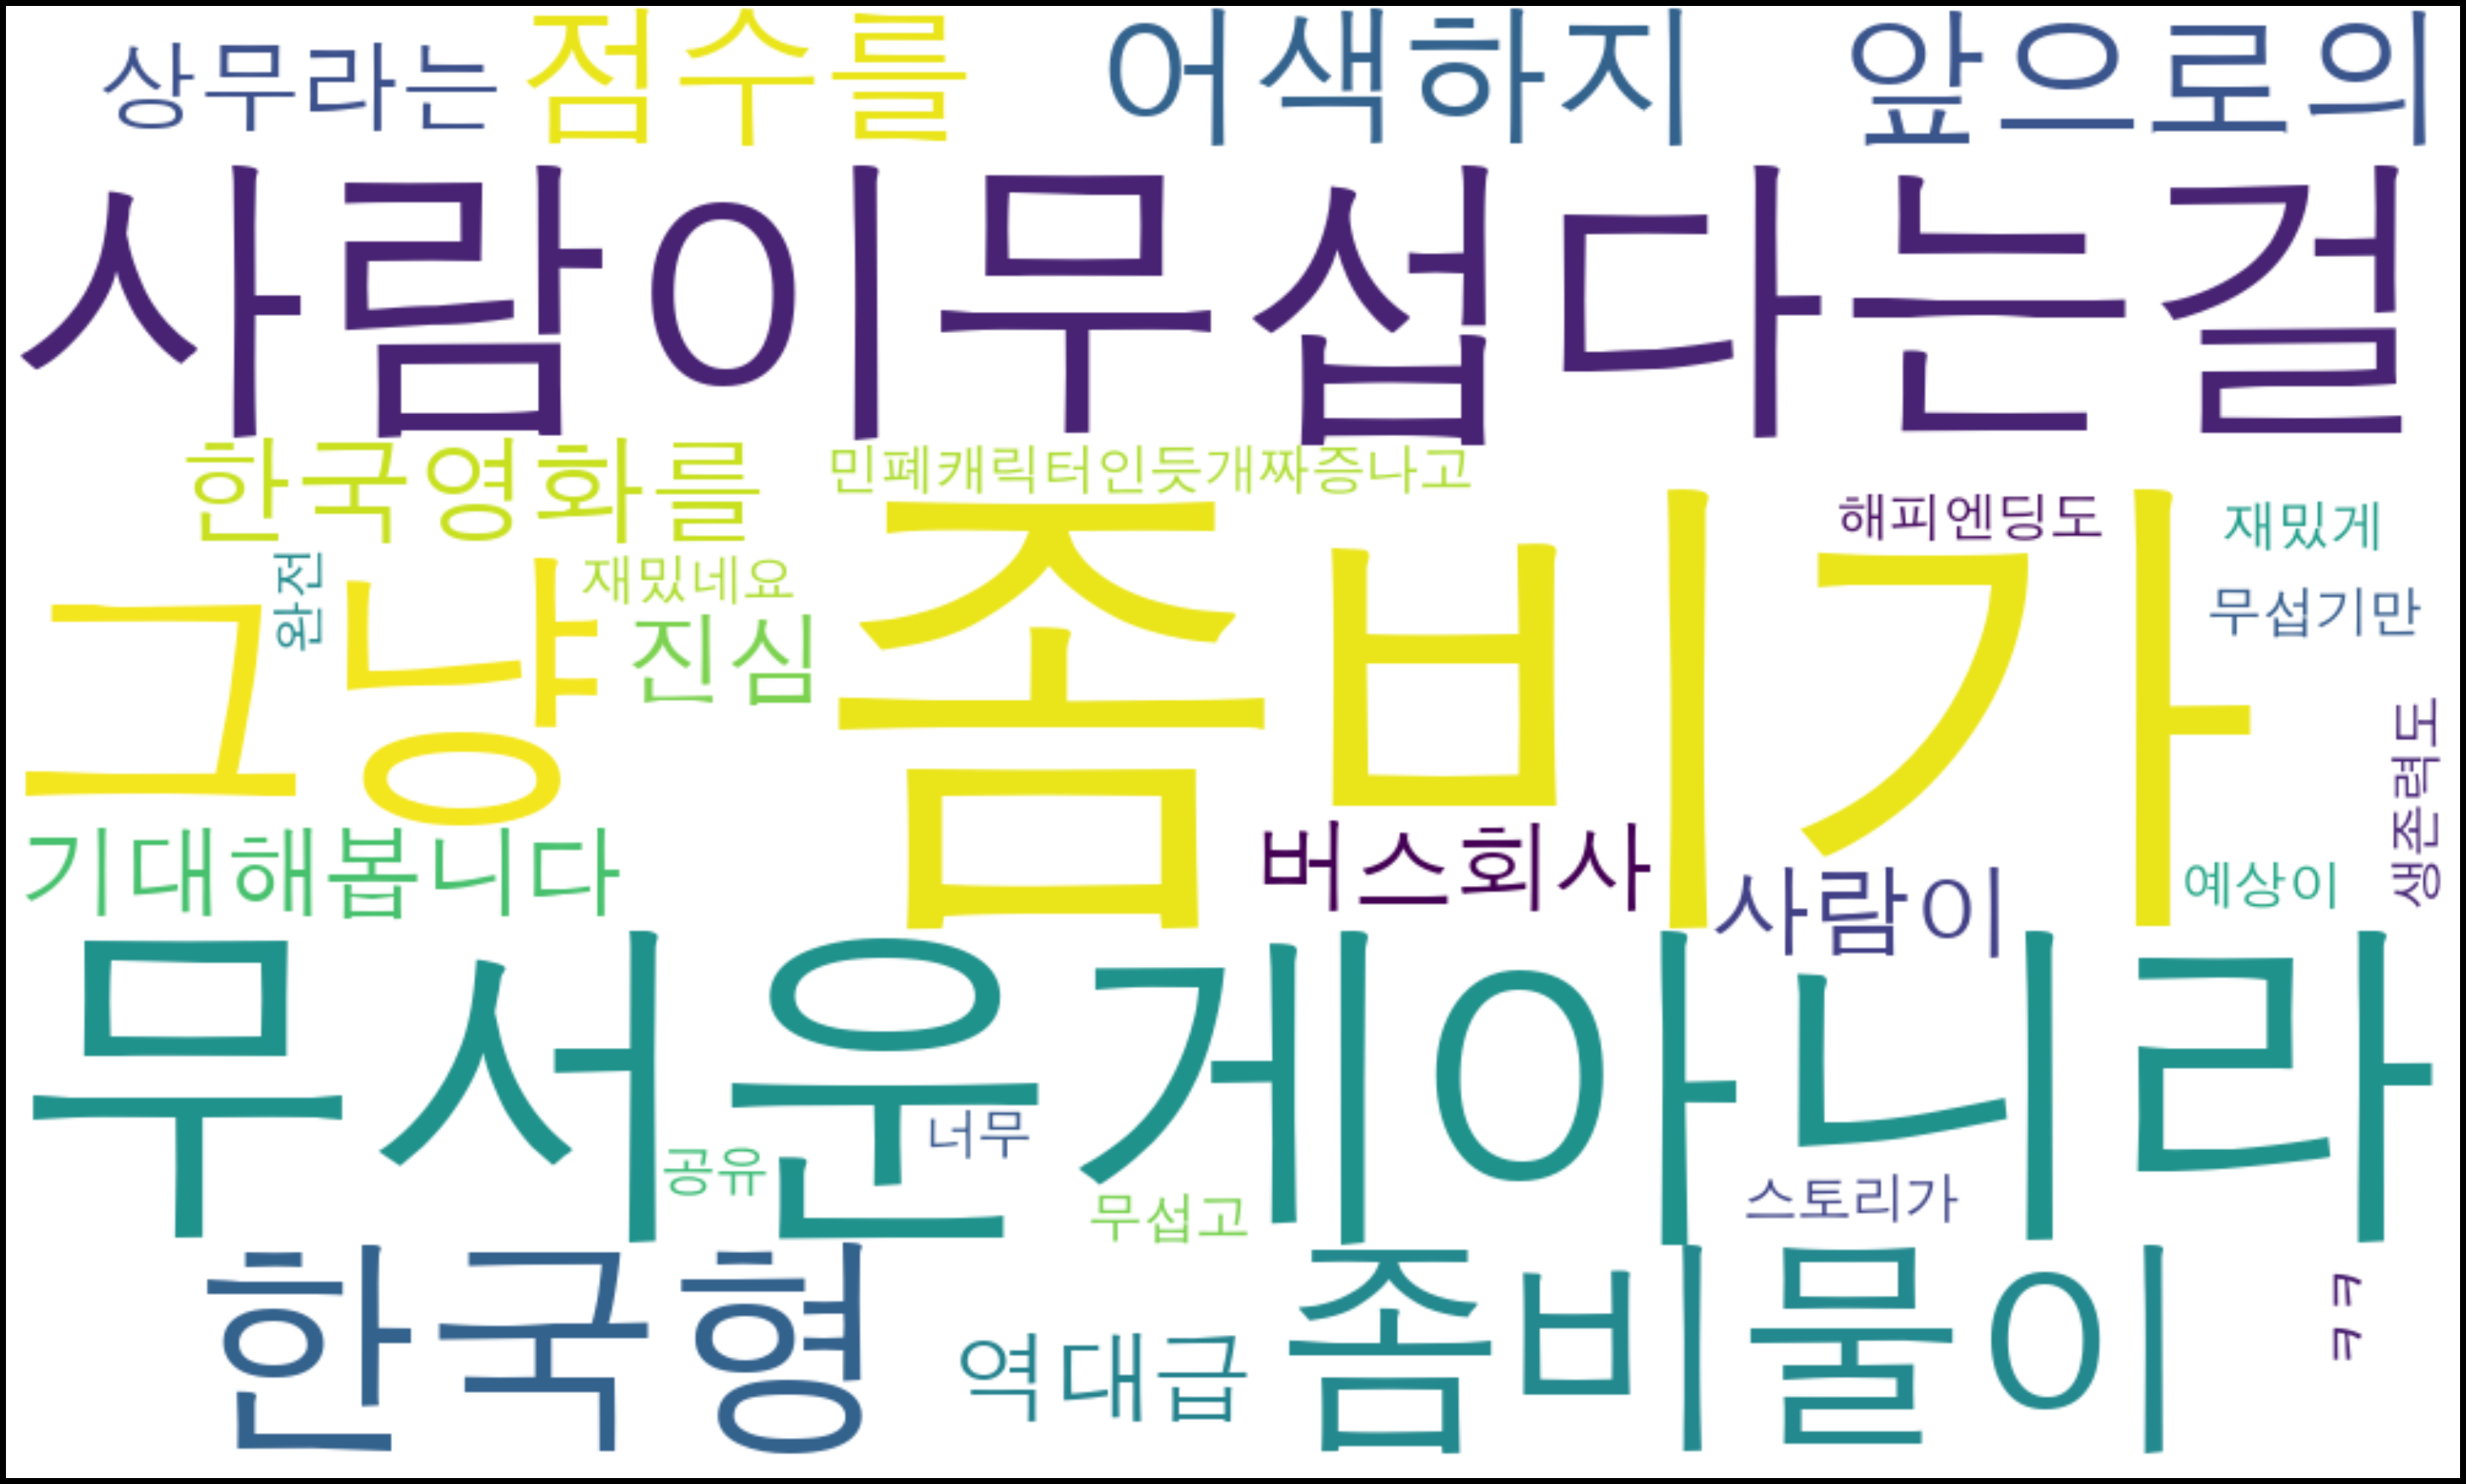

In [136]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()